In [ ]:
#pip install py-openaq

In [33]:
import pandas as pd

import matplotlib.pyplot as plt

In [34]:
air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2.csv", index_col=0, parse_dates=True)

In [35]:
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


<AxesSubplot:xlabel='datetime'>

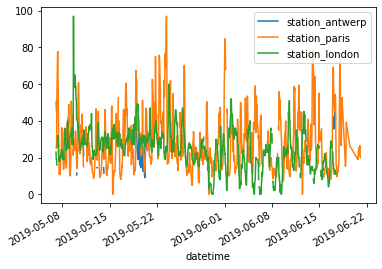

In [5]:
air_quality.plot()

<AxesSubplot:xlabel='datetime'>

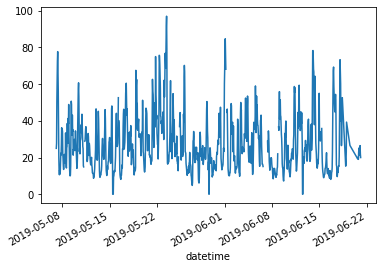

In [7]:
# I want to plot only the columns of the data table with the data from Paris.
air_quality["station_paris"].plot()

<AxesSubplot:xlabel='station_london', ylabel='station_paris'>

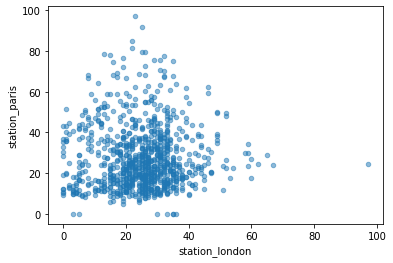

In [8]:
# I want to visually compare the NO2 values measured in London versus Paris.

air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)

In [9]:
# Apart from the default line plot when using the plot function, 
# a number of alternatives are available to plot data. 
# Let’s use some standard Python to get an overview of the available plot methods:

[
    method_name
    for method_name in dir(air_quality.plot)
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

In many development environments as well as IPython and Jupyter Notebook, use the TAB button to get an overview of the available methods, for example air_quality.plot. + TAB.

In [ ]:
#try the tab key when your cursor is at the end
air_quality.plot.

<AxesSubplot:>

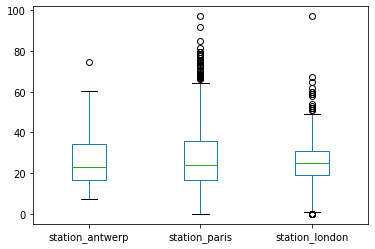

In [11]:
air_quality.plot.box()

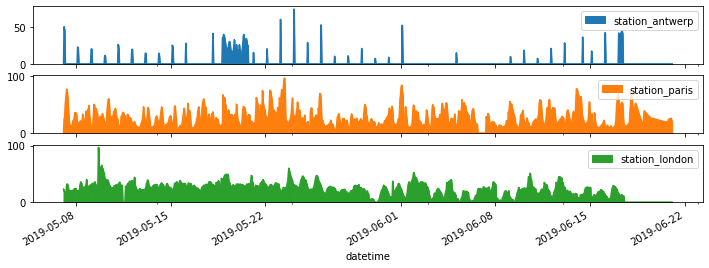

In [12]:
# I want each of the columns in a separate subplot.
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)

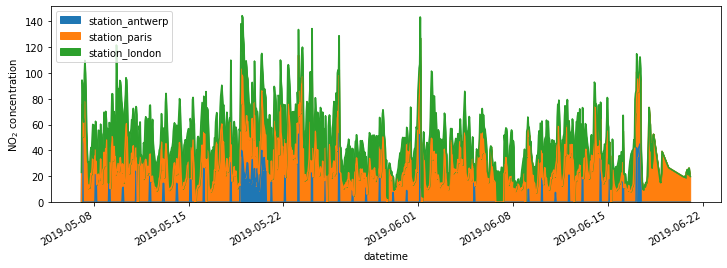

In [13]:
# I want to further customize, extend or save the resulting plot.
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.plot.area(ax=axs)
axs.set_ylabel("NO$_2$ concentration")
fig.savefig("no2_concentrations.png")
plt.show()

In [14]:
# I want to express the  NO2 concentration of the station in London in mg/m^3
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
# so I create a new column and hold those values
# To create a new column, use the [] brackets with the new column name at the left side of the assignment.



In [15]:
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [16]:
# I want to check the ratio of the values in Paris versus Antwerp and save the result in a new column.
air_quality["ratio_paris_antwerp"] = (
    air_quality["station_paris"] / air_quality["station_antwerp"]
)
# The calculation is again element-wise, so the / is applied for the values in each row.

In [17]:
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


I want to rename the data columns to the corresponding station identifiers used by [OpenAQ](https://openaq.org/)

In [18]:
air_quality_renamed = air_quality.rename(
    columns={
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminster",
    }
)

In [19]:
air_quality_renamed.head()

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


The rename() function can be used for both row labels and column labels. Provide a dictionary with the keys the current names and the values the new names to update the corresponding names.

The mapping should not be restricted to fixed names only, but can be a mapping function as well. For example, converting the column names to lowercase letters can be done using a function as well:

In [20]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)

In [21]:
air_quality_renamed.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [23]:
air_quality = pd.read_csv(
    "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_long.csv", index_col="date.utc", parse_dates=True
)

### Long to wide table format
Let’s use a small subset of the air quality data set. We focus on no2 data and only use the first two measurements of each location (i.e. the head of each group). The subset of data will be called no2_subset.

In [24]:
# filter for no2 data only
no2 = air_quality[air_quality["parameter"] == "no2"]

In [25]:
# use 2 measurements (head) for each location (groupby)
no2_subset = no2.sort_index().groupby(["location"]).head(2)


In [26]:
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


In [27]:
# I want the values for the three stations as separate columns next to each other.
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


The pivot() function is purely reshaping of the data: a single value for each index/column combination is required.

As pandas supports plotting of multiple columns (see [plotting tutorial](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html#min-tut-04-plotting)) out of the box, the conversion from long to wide table format enables the plotting of the different time series at the same time:

In [28]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


<AxesSubplot:xlabel='date.utc'>

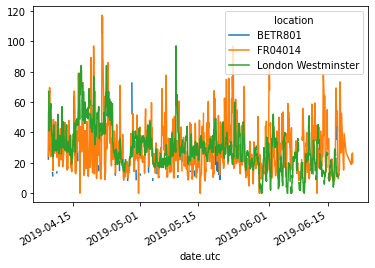

In [29]:
no2.pivot(columns="location", values="value").plot()

```note: When the index parameter is not defined, the existing index (row labels) is used.```

For more information about [pivot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html#pandas.DataFrame.pivot), see the user guide section on pivoting DataFrame objects.

## Pivot Table

In [30]:
# I want the mean concentrations for NO2 and in each of the stations in table form.
air_quality.pivot_table(
    values="value", index="location", columns="parameter", aggfunc="mean"
)

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In the case of pivot(), the data is only rearranged. When multiple values need to be aggregated (in this specific case, the values on different time steps), pivot_table() can be used, providing an aggregation function (e.g. mean) on how to combine these values.

Pivot table is a well known concept in spreadsheet software. When interested in the row/column margins (subtotals) for each variable, set the margins parameter to True:

In [31]:
air_quality.pivot_table(
    values="value",
    index="location",
    columns="parameter",
    aggfunc="mean",
    margins=True,
)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


For more information about [pivot_table()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table), see the user guide section on pivot tables.

Note: In case you are wondering, pivot_table() is indeed directly linked to groupby(). The same result can be derived by grouping on both parameter and location:

In [32]:
air_quality.groupby(["parameter", "location"]).mean()

value
parameter location                     
no2       BETR801             26.950920
          FR04014             29.374284
          London Westminster  29.740050
pm25      BETR801             23.169492
          London Westminster  13.443568